In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./_info.csv')
df = df.dropna()
print('report count:', len(df),', family count:', df['Family'].unique())
df.head(3)

report count: 77 , family count: ['dofloo' 'xorddos' 'Darlloz' 'lupper' 'Gafgyt' 'Luabot' 'Kaiten' 'Turla'
 'BPFDoor' 'Conti' 'ChinaZ' 'Defray777' 'Demonbot' 'EvilGnome'
 'FontOnLake' 'HCRootkit' 'KEYPLUG' 'Lightning' 'Melofee' 'XMRigMiner']


,Family,DocId,Genre,Txtname,Source,Title,objN,objD,objSysN,objSysD,opN,opD,opSysN,opSysD,obj,objSys,op,opSys,numOfSTobj,numOfSTsys
0,dofloo,"D1,1",news,Dofloo-BleepingComputer,bleepingcomputer.com,Exposed Docker APIs Abused by DDoS,0.0,69.0,0.0,10.0,0.0,371.0,0.0,9.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
1,dofloo,"D1,2",news,Dofloo-Securityaffairs,securityaffairs.co,AESDDoS exploits CVE20193396 flaw,8.0,69.0,2.0,10.0,7.0,371.0,3.0,9.0,0.115942,0.2,0.018868,0.115942,4.0,2.0
2,dofloo,"D1,3",analysis,Dofloo-SyscallParty,blog.syscall.party,Analysing the new Linux_AES.DDoS IoT malware,9.0,69.0,2.0,10.0,64.0,371.0,3.0,9.0,0.130435,0.2,0.172507,0.130435,9.0,5.0


In [2]:
df['Family'].value_counts()

BPFDoor       8
Gafgyt        8
Luabot        8
Darlloz       6
xorddos       6
Kaiten        5
dofloo        4
XMRigMiner    4
Turla         4
lupper        4
Conti         3
Defray777     3
KEYPLUG       3
Demonbot      2
FontOnLake    2
Melofee       2
ChinaZ        2
EvilGnome     1
HCRootkit     1
Lightning     1
Name: Family, dtype: int64

In [ ]:
familys = df['Family'].unique().tolist()
for fam in familys:
    df_fam = df[df['Family'] == fam]
    df_fam = df_fam.groupby(['Genre'])
    display(df_fam.value_counts())

### Plot completeness of ASG object (Gamma-old) in CTI documents
- scale min-max object count into [0,1]

Text(0.5, 0, 'Number of document')

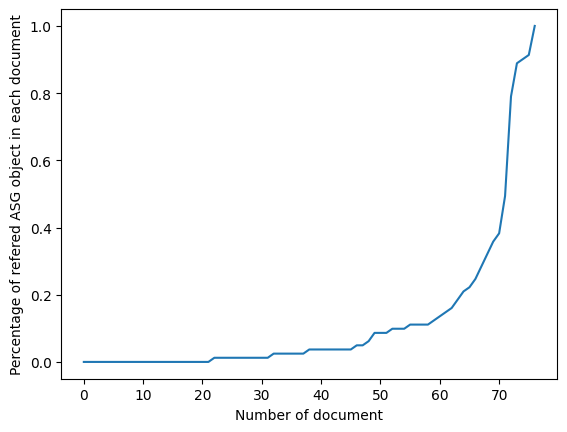

In [11]:
max = df['objN'].max()
min = df['objN'].min()

ioc_counts = df['objN']/max
ioc_counts = ioc_counts.sort_values()
ioc_counts = ioc_counts.to_list()

plt.plot(ioc_counts)
plt.ylabel("Percentage of refered ASG object in each document") # y label
plt.xlabel("Number of document") # x label

- 雙座標 (百分比和個數)
- 四分位數 (ing)

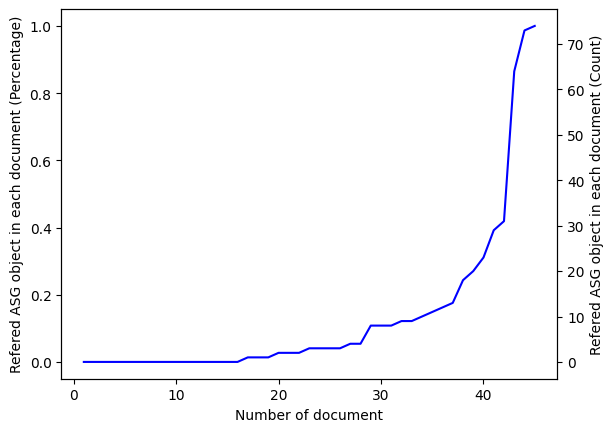

In [6]:
max = df['objN'].max()
min = df['objN'].min()

ioc_counts = df['objN']
ioc_percent = ioc_counts/max
ioc_percent = ioc_percent.sort_values()
ioc_percent = ioc_percent.to_list()
ioc_counts = sorted(ioc_counts.to_list())

x_data = list(range(1, len(ioc_percent)+1))

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x_data, ioc_percent, 'w-') # hide the first line 兩條線畫起來趨勢一樣
ax2.plot(x_data, ioc_counts, 'b-')

ax1.set_xlabel('Number of document')
ax1.set_ylabel('Refered ASG object in each document (Percentage)', color='black')
ax2.set_ylabel('Refered ASG object in each document (Count)', color='black')

plt.show()

### Plot completeness of STobject (Gamma-new) in CTI documents

21
mean:0.09, q25:0.0, q75:0.1304347826086956
max 5 ioc counts: [0.2592592592592592, 0.3076923076923077, 0.3333333333333333, 0.4090909090909091, 0.4090909090909091]


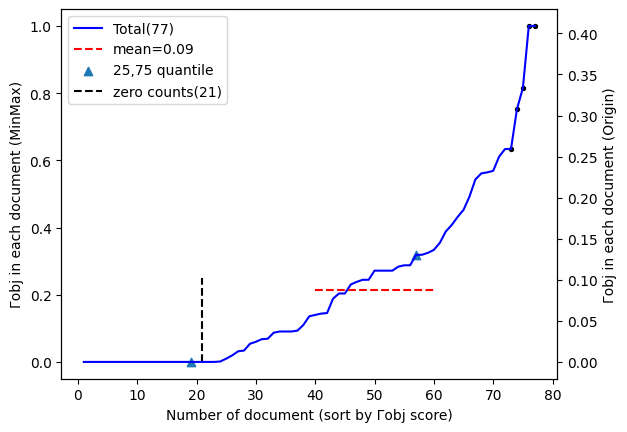

In [12]:
# https://stackoverflow.com/questions/24988448/how-to-draw-vertical-lines-on-a-given-plot
# https://stackoverflow.com/questions/9834452/how-do-i-make-a-single-legend-for-many-subplots

def last_index_of(number:int, lst:list) -> int:
    ''' return index of last appearance of the number '''
    if number not in lst:
        return -1
    last_index = 0
    for i,v in enumerate(lst):
        if v == number:
            last_index = i
    return last_index

last_index_of(0, [0,0,0,0,1,2,3,4]) # 3
last_index_of(0, [0,0,0,1,2,0,3,4]) # 5

max = df['obj'].max() # 不使用numOfSTobj
min = df['obj'].min()
ioc_counts = df['obj']
ioc_counts = sorted(ioc_counts.to_list())
ioc_percent = ioc_counts/max
x_data = list(range(1, len(ioc_percent)+1))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x_data, ioc_percent, 'w-') # hide the first line 兩條線畫起來趨勢一樣
ax2.plot(x_data, ioc_counts, 'b-', label=f'Total({len(ioc_counts)})')
ax1.set_xlabel('Number of document (sort by Γobj score)')
ax1.set_ylabel('Γobj in each document (MinMax)', color='black')
ax2.set_ylabel('Γobj in each document (Origin)', color='black')

# 畫出最大的5個點
ax2.scatter(x_data[-5:], ioc_counts[-5:], marker='o', s=8, c='k')

# 畫出 ioc 數量=0個的刻度
zero = last_index_of(0, ioc_counts)
print(zero)

# 平均數, 25&75百分位數
mean_percent = np.mean(ioc_percent)
mean_count = np.mean(ioc_counts)
q25y, q75y = np.quantile(ioc_counts, np.array([0.25, 0.75]))
q25x, q75x = len(ioc_counts)//4, len(ioc_counts)*3//4
print(f"mean:{mean_count:.2f}, q25:{q25y}, q75:{q75y}")
print(f"max 5 ioc counts: {ioc_counts[-5:]}")

# plt.plot(ioc_counts, label=f'Total({len(ioc_counts)})')
ax1.vlines(x=zero, ymin=-0.00, ymax=0.25, colors='black', ls='--', label=f'zero counts({zero})')
ax2.hlines(y=mean_count, xmin=40, xmax=60, colors='r', ls='--', label=f'mean={mean_count:.2f}')
ax2.scatter([q25x, q75x], [q25y, q75y], marker='^', label='25,75 quantile')

handles, labels = [(a + b) for a, b in zip(ax2.get_legend_handles_labels(), ax1.get_legend_handles_labels())]
ax1.legend(handles, labels, loc='upper left')
# plt.legend() # Add legend

將其中3個類別獨立出來看 (campaign只有1篇先不畫)

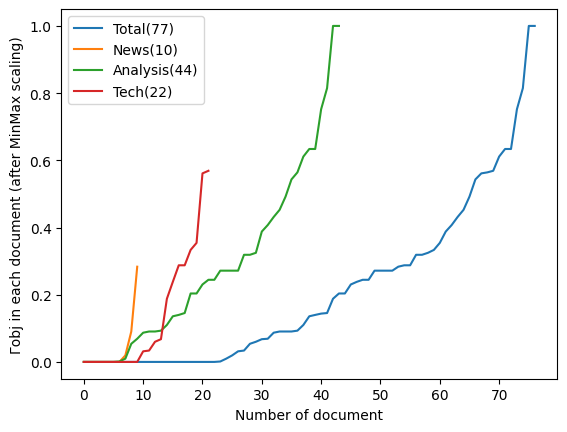

In [13]:
max = df['obj'].max()
min = df['obj'].min()

ioc_counts = df['obj']/max # 不使用numOfSTobj
ioc_counts = ioc_counts.sort_values()
ioc_counts = ioc_counts.to_list()

df_news = df[df['Genre'] == 'news']
df_analysis = df[df['Genre'] == 'analysis']
df_tech = df[df['Genre'] == 'tech']
# campaign 只有一篇 Kaiten-trendmicro

ioc_news_cnt = df_news['obj']/max 
ioc_news_cnt = ioc_news_cnt.sort_values().to_list()

ioc_anal_cnt = df_analysis['obj']/max
ioc_anal_cnt = ioc_anal_cnt.sort_values().to_list()

ioc_tech_cnt = df_tech['obj']/max
ioc_tech_cnt = ioc_tech_cnt.sort_values().to_list()

plt.plot(ioc_counts, label=f'Total({len(ioc_counts)})')
plt.plot(ioc_news_cnt, label=f'News({len(ioc_news_cnt)})')
plt.plot(ioc_anal_cnt, label=f'Analysis({len(ioc_anal_cnt)})')
plt.plot(ioc_tech_cnt, label=f'Tech({len(ioc_tech_cnt)})')
plt.ylabel("Γobj in each document (after MinMax scaling)") # y label
plt.xlabel("Number of document") # x label
plt.legend() # Add legend

In [14]:
# 最多 IoC 的分別是: D3,4 D3,5 D2,4 D1,4 D1,3
# df.sort_values(by=['numOfSTobj'], ascending=False).head(5)
df.sort_values(by=['obj'], ascending=False).head(5)

,Family,DocId,Genre,Txtname,Source,Title,objN,objD,objSysN,objSysD,opN,opD,opSysN,opSysD,obj,objSys,op,opSys,numOfSTobj,numOfSTsys
65,FontOnLake,"D15,2",analysis,FontOnLake-eset.wp,eset,Research white papers,9.0,22.0,0.0,0.0,20.0,73.0,1.0,1.0,0.409091,0.0,0.273973,0.409091,9.0,0.0
66,HCRootkit,"D16,1",analysis,HCRootkit-lacework,lacework,Sutersu Linux Rootkit Analysis,9.0,22.0,0.0,0.0,4.0,73.0,1.0,1.0,0.409091,0.0,0.054795,0.409091,6.0,0.0
22,Gafgyt,"D4,4",analysis,Gafgyt-securityscorecard,resources.securityscorecard.com,A Detailed Analysis Of The Gafgyt Malware Tar...,12.0,36.0,0.0,0.0,12.0,79.0,0.0,0.0,0.333333,0.0,0.151899,0.333333,4.0,0.0
42,Turla,"D7,2",analysis,Turla-leonardo,leonardo.com,Malware Technical Insight Turla Penquin_x64,4.0,13.0,0.0,0.0,1.0,20.0,0.0,0.0,0.307692,0.0,0.050000,0.307692,3.0,0.0
51,BPFDoor,"D9,7",analysis,BPFDoor-sandflysecurity,sandflysecurity,An Evasive Linux Backdoor Technical Analysis,7.0,27.0,0.0,0.0,4.0,74.0,0.0,0.0,0.259259,0.0,0.054054,0.259259,11.0,0.0


### Plot Phi 指標 (ASG steps)

40
mean:0.03, q25:0.0, q75:0.0269541778975741
max 5 steps counts: [0.1645569620253164, 0.1725067385444744, 0.2162162162162162, 0.273972602739726, 0.3108108108108108]


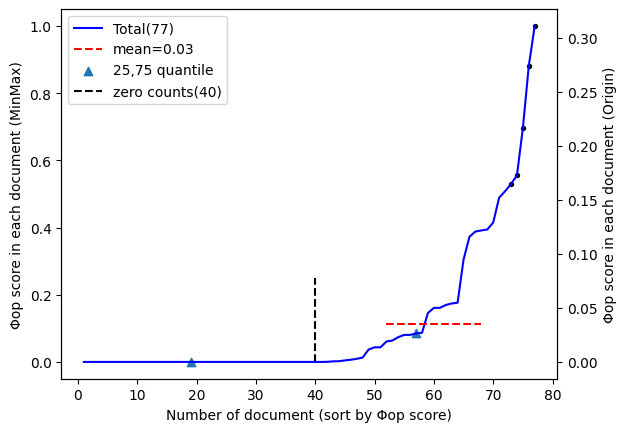

In [15]:
# https://stackoverflow.com/questions/24988448/how-to-draw-vertical-lines-on-a-given-plot
# https://stackoverflow.com/questions/9834452/how-do-i-make-a-single-legend-for-many-subplots

ioc_counts = df['op'] # 不使用opN
max = ioc_counts.max()
min = ioc_counts.min()
ioc_counts = sorted(ioc_counts.to_list())
ioc_percent = ioc_counts/max
x_data = list(range(1, len(ioc_percent)+1))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(x_data, ioc_percent, 'w-') # hide the first line 兩條線畫起來趨勢一樣
ax2.plot(x_data, ioc_counts, 'b-', label=f'Total({len(ioc_counts)})')
ax1.set_xlabel('Number of document (sort by Φop score)')
ax1.set_ylabel('Φop score in each document (MinMax)', color='black') # Refered ASG step 
ax2.set_ylabel('Φop score in each document (Origin)', color='black')

# 畫出最大的5個點
ax2.scatter(x_data[-5:], ioc_counts[-5:], marker='o', s=8, c='k')

# 畫出 ioc 數量=0個的刻度
zero = last_index_of(0, ioc_counts)
print(zero)

# 平均數, 25&75百分位數
mean_percent = np.mean(ioc_percent)
mean_count = np.mean(ioc_counts)
q25y, q75y = np.quantile(ioc_counts, np.array([0.25, 0.75]))
q25x, q75x = len(ioc_counts)//4, len(ioc_counts)*3//4
print(f"mean:{mean_count:.2f}, q25:{q25y}, q75:{q75y}")
print(f"max 5 steps counts: {ioc_counts[-5:]}")

# plt.plot(ioc_counts, label=f'Total({len(ioc_counts)})')
ax1.vlines(x=zero, ymin=-0.00, ymax=0.25, colors='black', ls='--', label=f'zero counts({zero})')
ax2.hlines(y=mean_count, xmin=52, xmax=68, colors='r', ls='--', label=f'mean={mean_count:.2f}')
ax2.scatter([q25x, q75x], [q25y, q75y], marker='^', label='25,75 quantile')

handles, labels = [(a + b) for a, b in zip(ax2.get_legend_handles_labels(), ax1.get_legend_handles_labels())]
ax1.legend(handles, labels, loc='upper left')
# plt.legend() # Add legend

- 可以看到 ASG step 最多的是 Analysis 類別和 STobject 的 tech 相反。

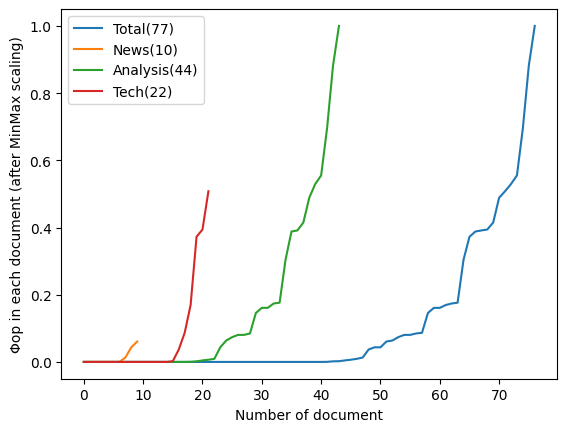

In [16]:
max = df['op'].max()
min = df['op'].min()

ioc_counts = df['op']/max
ioc_counts = ioc_counts.sort_values()
ioc_counts = ioc_counts.to_list()

df_news = df[df['Genre'] == 'news']
df_analysis = df[df['Genre'] == 'analysis']
df_tech = df[df['Genre'] == 'tech']
# campaign 只有一篇 Kaiten-trendmicro

ioc_news_cnt = df_news['op']/max
ioc_news_cnt = ioc_news_cnt.sort_values().to_list()

ioc_anal_cnt = df_analysis['op']/max
ioc_anal_cnt = ioc_anal_cnt.sort_values().to_list()

ioc_tech_cnt = df_tech['op']/max
ioc_tech_cnt = ioc_tech_cnt.sort_values().to_list()

plt.plot(ioc_counts, label=f'Total({len(ioc_counts)})')
plt.plot(ioc_news_cnt, label=f'News({len(ioc_news_cnt)})')
plt.plot(ioc_anal_cnt, label=f'Analysis({len(ioc_anal_cnt)})')
plt.plot(ioc_tech_cnt, label=f'Tech({len(ioc_tech_cnt)})')
plt.ylabel("Φop in each document (after MinMax scaling)") # y label
plt.xlabel("Number of document") # x label
plt.legend() # Add legend

### 製作統計數據

In [17]:
# Gamma
tmp = df.sort_values(by=['obj'], ascending=False)
a = tmp[['Family', 'DocId', 'Genre', 'obj']].head(5)
a.rename(columns = {'obj':'Γobj'}, inplace = True)
display(a)

# Phi
tmp = df.sort_values(by=['op'], ascending=False)
a = tmp[['Family', 'DocId', 'Genre', 'op']].head(5)
a.rename(columns = {'op':'Φop'}, inplace = True)
display(a)

,Family,DocId,Genre,Γobj
65,FontOnLake,"D15,2",analysis,0.409091
66,HCRootkit,"D16,1",analysis,0.409091
22,Gafgyt,"D4,4",analysis,0.333333
42,Turla,"D7,2",analysis,0.307692
51,BPFDoor,"D9,7",analysis,0.259259


,Family,DocId,Genre,Φop
49,BPFDoor,"D9,5",analysis,0.310811
65,FontOnLake,"D15,2",analysis,0.273973
48,BPFDoor,"D9,4",analysis,0.216216
2,dofloo,"D1,3",analysis,0.172507
23,Gafgyt,"D4,3",analysis,0.164557


In [5]:
df.head(3)

,Family,DocId,Genre,Txtname,Source,Title,objN,objD,objSysN,objSysD,opN,opD,opSysN,opSysD,obj,objSys,op,opSys,numOfSTobj,numOfSTsys
0,dofloo,"D1,1",news,Dofloo-BleepingComputer,bleepingcomputer.com,Exposed Docker APIs Abused by DDoS,0.0,69.0,0.0,10.0,0.0,371.0,0.0,9.0,0.000000,0.0,0.000000,0.000000,0.0,0.0
1,dofloo,"D1,2",news,Dofloo-Securityaffairs,securityaffairs.co,AESDDoS exploits CVE20193396 flaw,8.0,69.0,2.0,10.0,7.0,371.0,3.0,9.0,0.115942,0.2,0.018868,0.115942,4.0,2.0
2,dofloo,"D1,3",analysis,Dofloo-SyscallParty,blog.syscall.party,Analysing the new Linux_AES.DDoS IoT malware,9.0,69.0,2.0,10.0,64.0,371.0,3.0,9.0,0.130435,0.2,0.172507,0.130435,9.0,5.0


In [4]:
# 資策會提供的報告的指標
iii = df[df['Family'].isin([
 'BPFDoor', 'Conti', 'ChinaZ', 'Defray777', 'Demonbot', 'EvilGnome',
 'FontOnLake', 'HCRootkit', 'KEYPLUG', 'Lightning', 'Melofee', 'XMRigMiner',])]
iii = df
# iii['Γobj'] = iii['objN'] / iii['objD']
# iii['Γrsc'] = iii['objSysN'] / iii['objSysD']
# iii['Φop']  = iii['opN'] / iii['opD']
# iii['Φsys'] = iii['opN'] / iii['opD']
iii = iii[['Family', 'DocId', 'obj', 'objSys', 'op', 'opSys']]
iii.rename(columns = {
    'obj':'Γobj',
    'objSys':'Γrsc' ,
    'op': 'Φop',
    'opSys': 'Φsys'
}, inplace = True)
iii.replace(to_replace = 0, value = '', inplace=True)
iii.to_csv('_quality_metrics.csv', index=False)
iii

C:\Users\luweb\AppData\Local\Temp\ipykernel_26540\525076965.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iii.rename(columns = {
C:\Users\luweb\AppData\Local\Temp\ipykernel_26540\525076965.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iii.replace(to_replace = 0, value = '', inplace=True)


,Family,DocId,Γobj,Γrsc,Φop,Φsys
0,dofloo,"D1,1",,,,
1,dofloo,"D1,2",0.115942,0.2,0.018868,0.115942
2,dofloo,"D1,3",0.130435,0.2,0.172507,0.130435
3,dofloo,"D1,4",0.144928,0.6,0.026954,0.144928
4,xorddos,"D2,1",,,,
...,...,...,...,...,...,...
72,Melofee,"D19,2",,,,
78,XMRigMiner,"D21,1",0.059524,,,0.059524
79,XMRigMiner,"D21,2",0.007937,,0.004049,0.007937
80,XMRigMiner,"D21,3",0.15873,,0.026316,0.15873
